In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [2]:
df = pd.read_csv('glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [4]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

<AxesSubplot:>

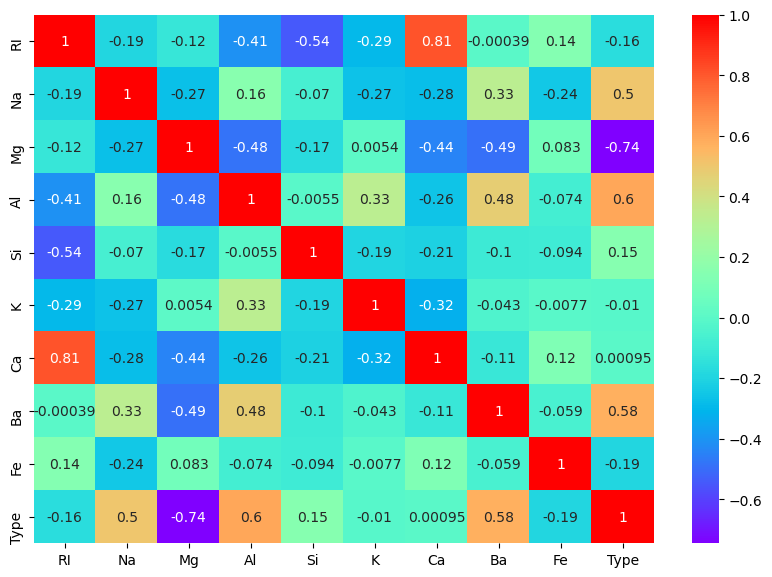

In [5]:
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.dpi'] = (100)
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='rainbow')

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RI', ylabel='Ca'>

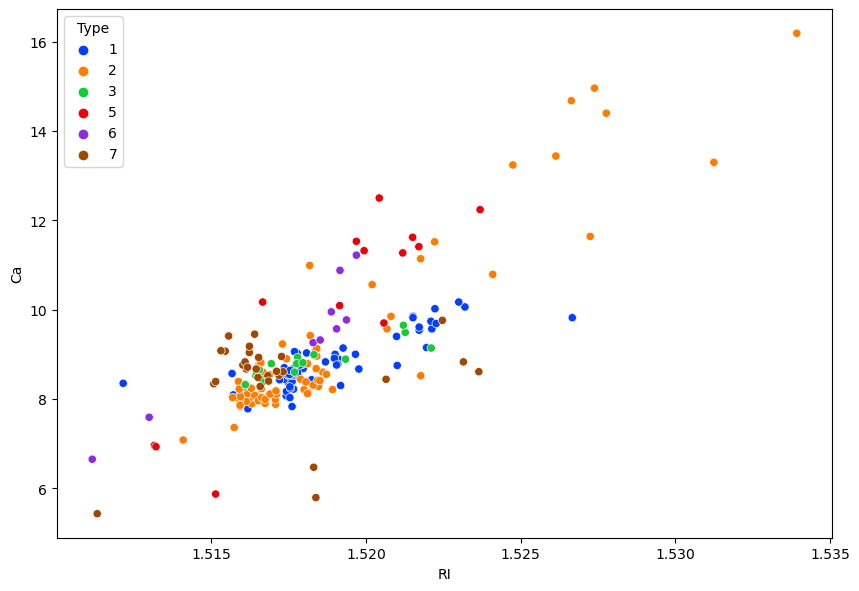

In [7]:
sns.scatterplot(df['RI'], df['Ca'], hue='Type', data=df,palette='bright')

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


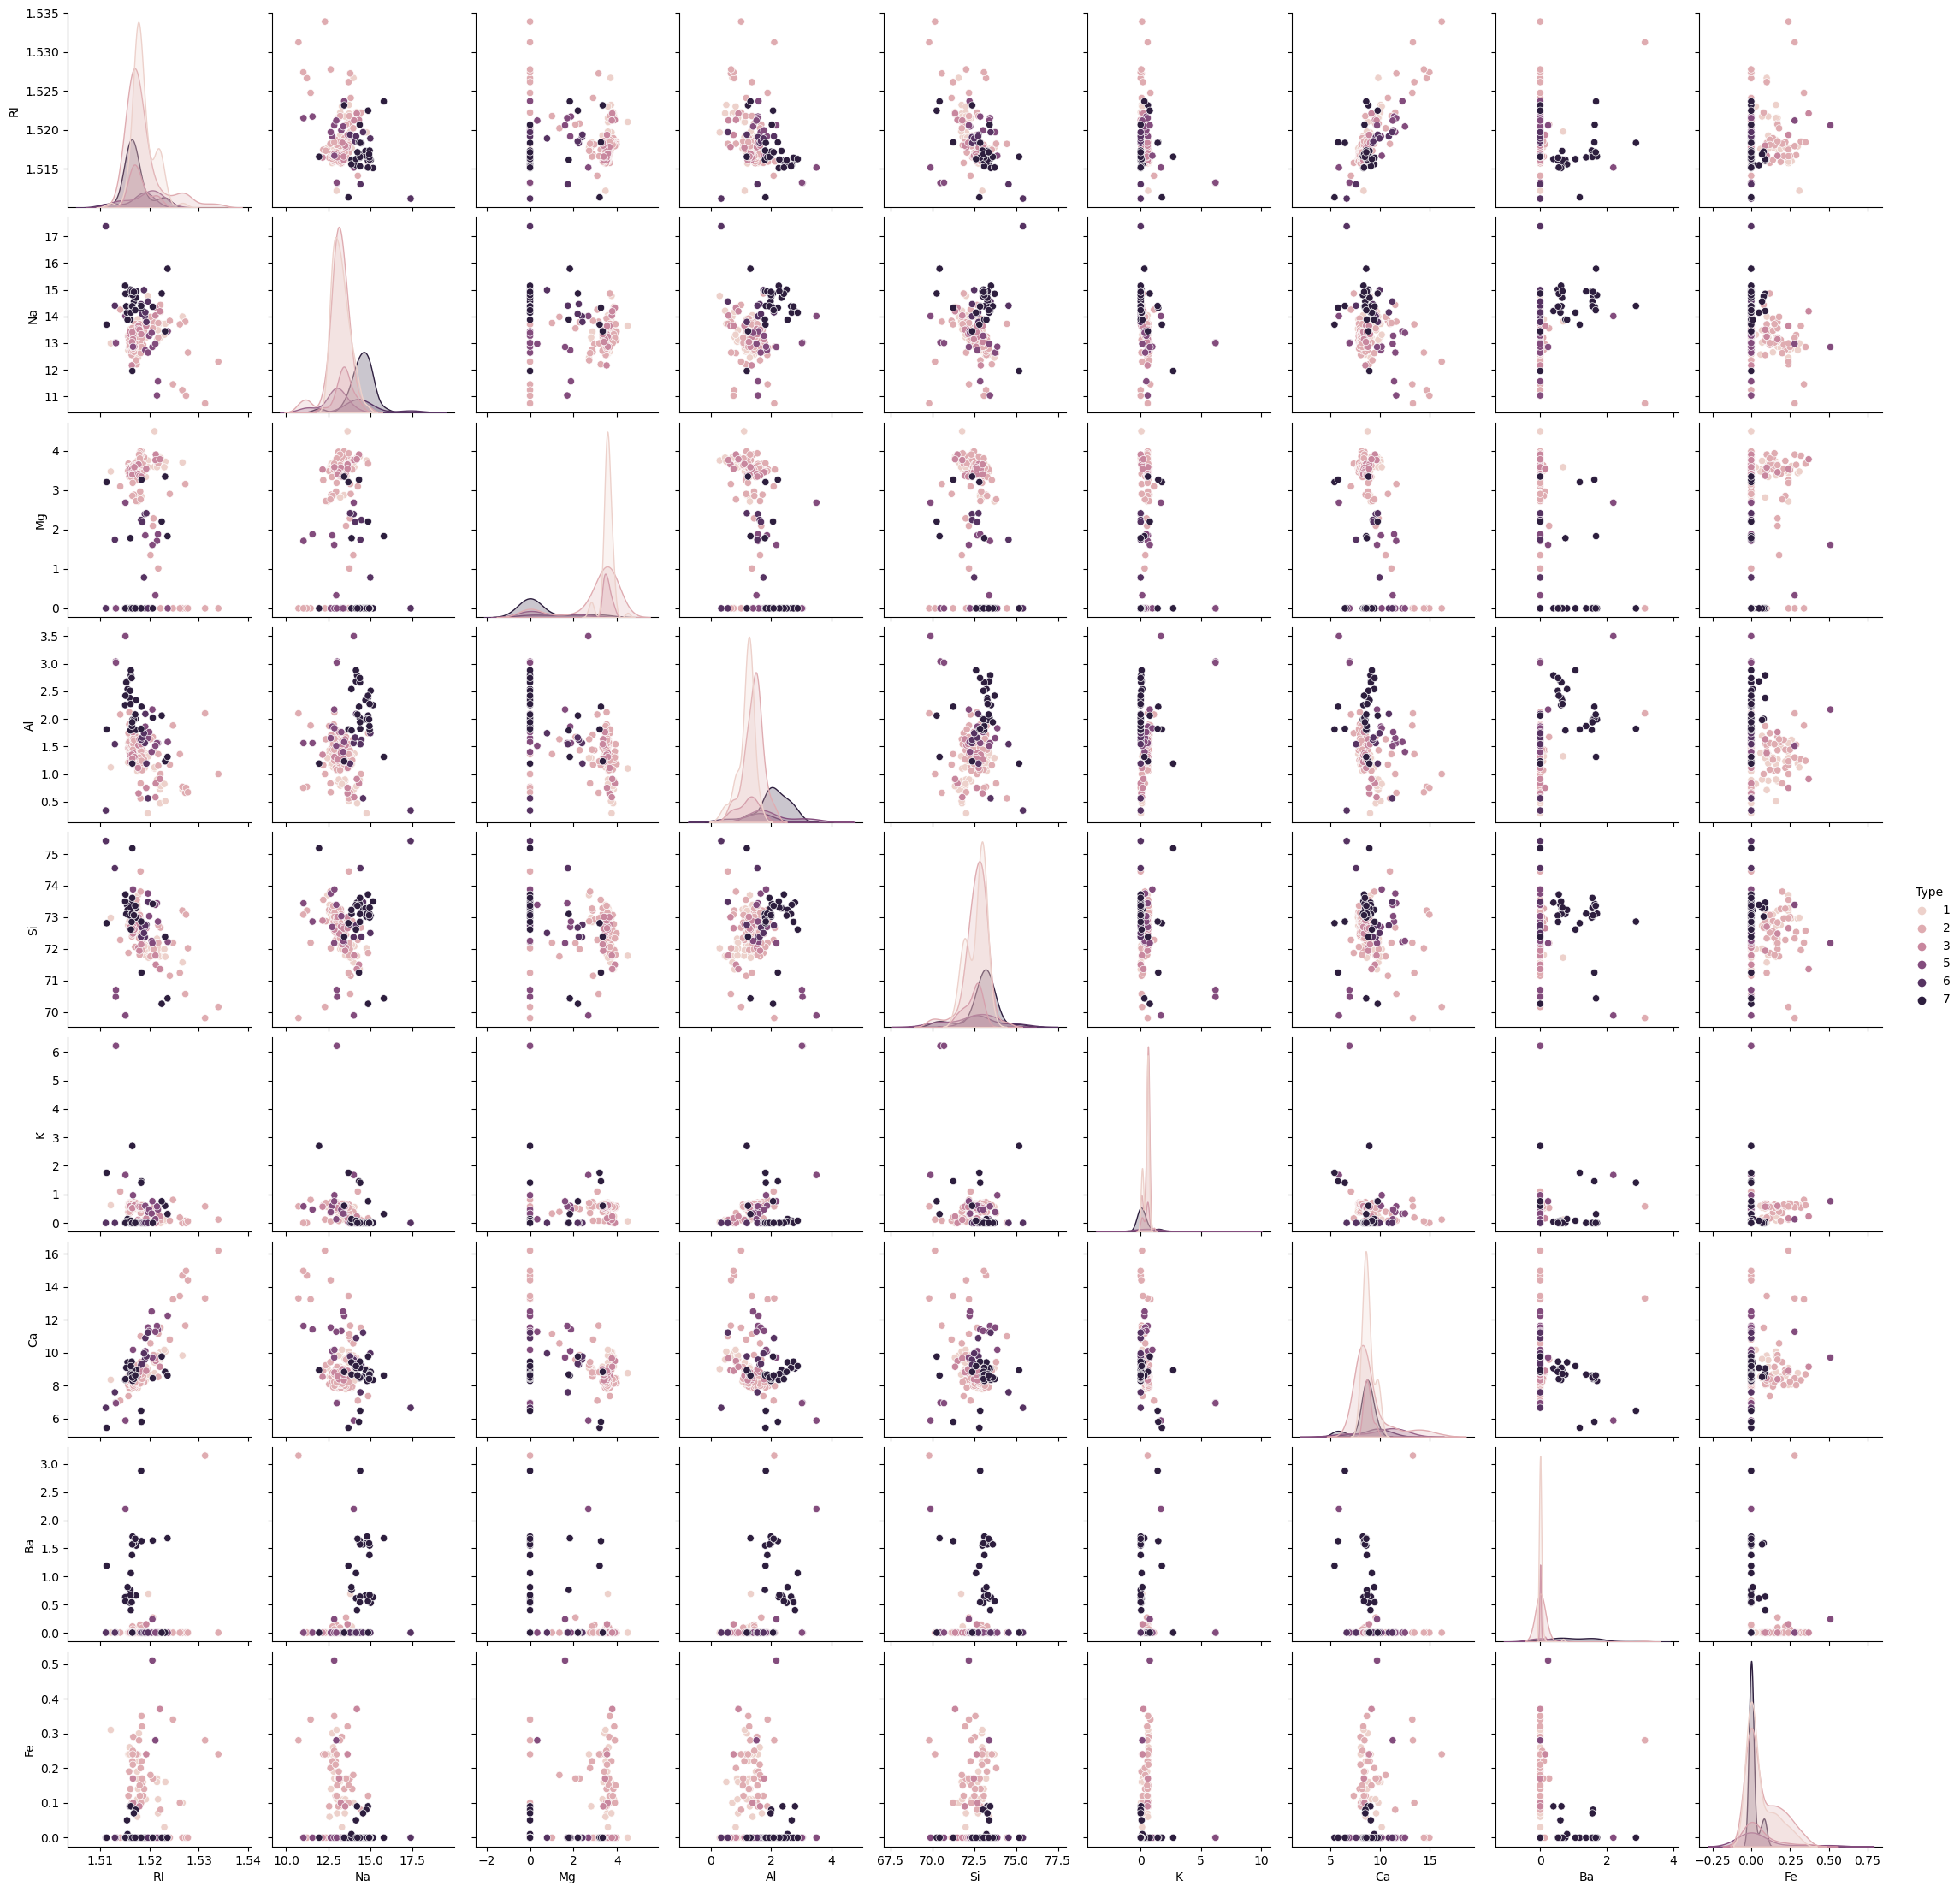

In [8]:
sns.pairplot(df, hue='Type')

In [9]:
x = df.iloc[:,:9]
y = df['Type']

In [10]:
scaler = StandardScaler()
sc = scaler.fit_transform(df.drop(columns=['Type']))
sc = pd.DataFrame(sc, columns=x.columns)

In [11]:
sc

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


In [12]:
data = sc.join(y)
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451,1
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451,1
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451,1
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451,1
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451,1


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='count'>

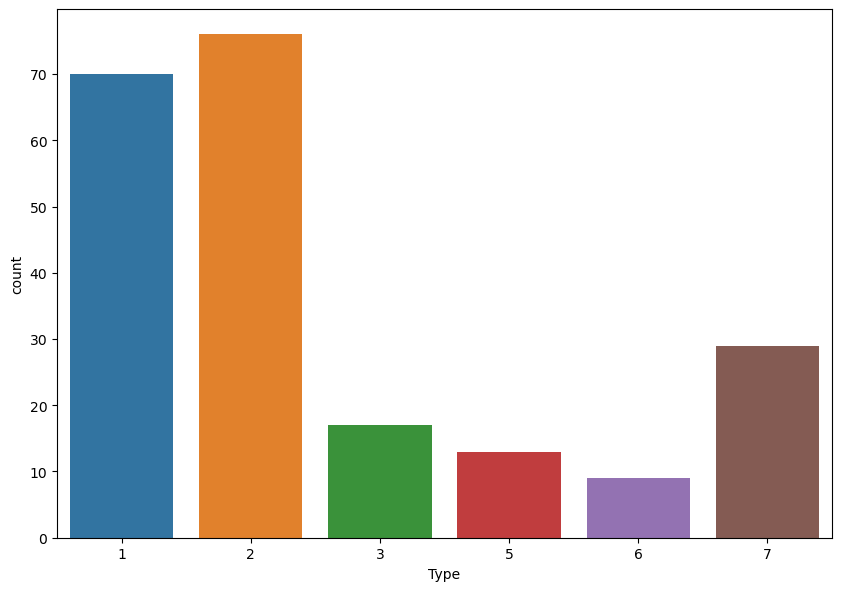

In [13]:
sns.countplot(df['Type'])

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [21]:
X = df.iloc[:,:9]
Y = df['Type']

In [24]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Feature'] = X.columns
vif

,VIF,Feature
0,725048.576068,RI
1,13890.374403,Na
2,795.895474,Mg
3,175.092652,Al
4,366484.182843,Si
5,56.832884,K
6,8031.654306,Ca
7,27.374304,Ba
8,1.597314,Fe


In [25]:
#Removing features with hight vif value.

In [26]:
df1 = data.drop(columns=['RI','Na','Si','Ca','Mg'])

In [27]:
df1

,Al,K,Ba,Fe,Type
0,-0.692442,-0.671705,-0.352877,-0.586451,1
1,-0.170460,-0.026213,-0.352877,-0.586451,1
2,0.190912,-0.164533,-0.352877,-0.586451,1
3,-0.310994,0.112107,-0.352877,-0.586451,1
4,-0.411375,0.081369,-0.352877,-0.586451,1
...,...,...,...,...,...
209,2.881125,-0.640968,1.783978,-0.586451,7
210,1.094342,-0.763919,2.852405,-0.586451,7
211,1.154570,-0.763919,2.953200,-0.586451,7
212,0.993960,-0.763919,2.812087,-0.586451,7


# 

**Model Building**

- We will built a model by initializing a random k value.

In [28]:
X = df1.iloc[:,:4]
Y = df['Type']

In [30]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.30)

In [31]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)

KNeighborsClassifier()

In [32]:
y_pred = model.predict(x_test)


from sklearn.metrics import accuracy_score, confusion_matrix
print('The accuracy score is: ', accuracy_score(y_test, y_pred))

The accuracy score is:  0.5846153846153846


## CHOOSING THE CORRECT VALUE FOR K:

In [34]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

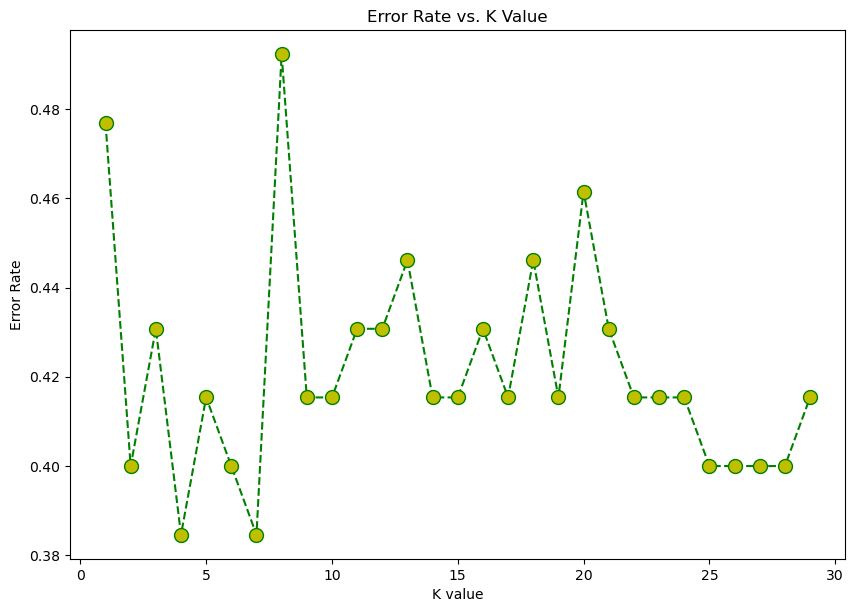

In [35]:
plt.plot(range(1,30),error_rate,color='g', linestyle='dashed', marker='o', markerfacecolor='y', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K value')
plt.ylabel('Error Rate')

- From the above graph we can see that the error rate is increasing after K = 4.
- So we will select the K value as 4.

In [38]:
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(x_train,y_train)
knn_pred = knn_model.predict(x_test)

In [39]:
print('The accuarcy score is: ', accuracy_score(y_test, knn_pred))
print('The confusion matrix is: ', confusion_matrix(y_test,knn_pred))

The accuarcy score is:  0.6153846153846154
The confusion matrix is:  [[16  6  0  0  0  0]
 [ 7 13  0  0  0  0]
 [ 3  2  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 1  0  0  0  0  0]
 [ 1  0  0  0  0 11]]


In [40]:
prediction = pd.DataFrame({"Actual":y_test,"Predicted":knn_pred})
prediction

,Actual,Predicted
98,2,2
155,3,1
34,1,1
2,1,2
5,1,1
...,...,...
168,5,2
108,2,1
24,1,1
38,1,1
